# 三、插值
scipy.interpolate模块有一维插值函数interp1d、二维插值函数interp2d、多维插值函数interpn, interpnd.
## 1. 一维插值

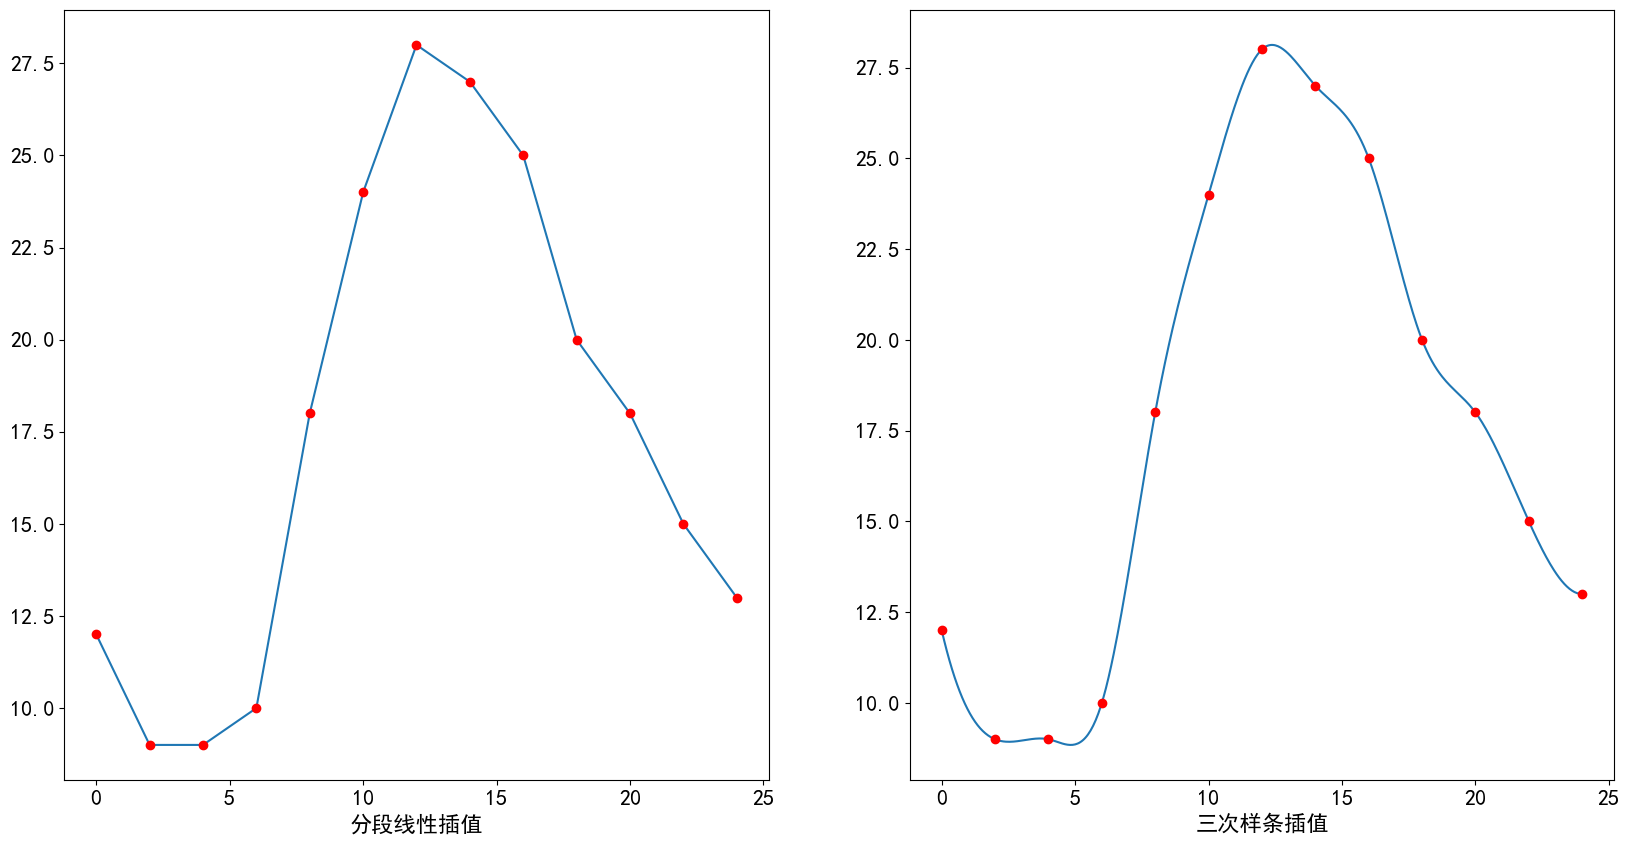

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# %matplotlib tk
#%matplotlib inline


# 插值节点
x = np.arange(0, 25, 2)
y = np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])

# 插值点
xnew = np.linspace(0, 24, 500)
fun1 = interp1d(x, y)
fun2 = interp1d(x, y, 'cubic')
y1 = fun1(xnew)
y2 = fun2(xnew)

plt.figure(figsize=(20,10))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.subplot(121)
plt.plot(xnew, y1, x, y, 'ro')
plt.xlabel("分段线性插值")
plt.subplot(122)
plt.plot(xnew, y2, x, y, 'ro')
plt.xlabel("三次样条插值")
plt.show()

## 2.二维网格节点插值
已知平面区域$0 \leqslant x \leqslant 1400$, $0 \leqslant y \leqslant 1200$的高程数据见文件"Pdata7_5.txt"(单位：$m$).求该区域地表面积的近似值，并用插值数据画出该区域的等高线图和三维表面图.

区域的面积为： 4782737.815311186


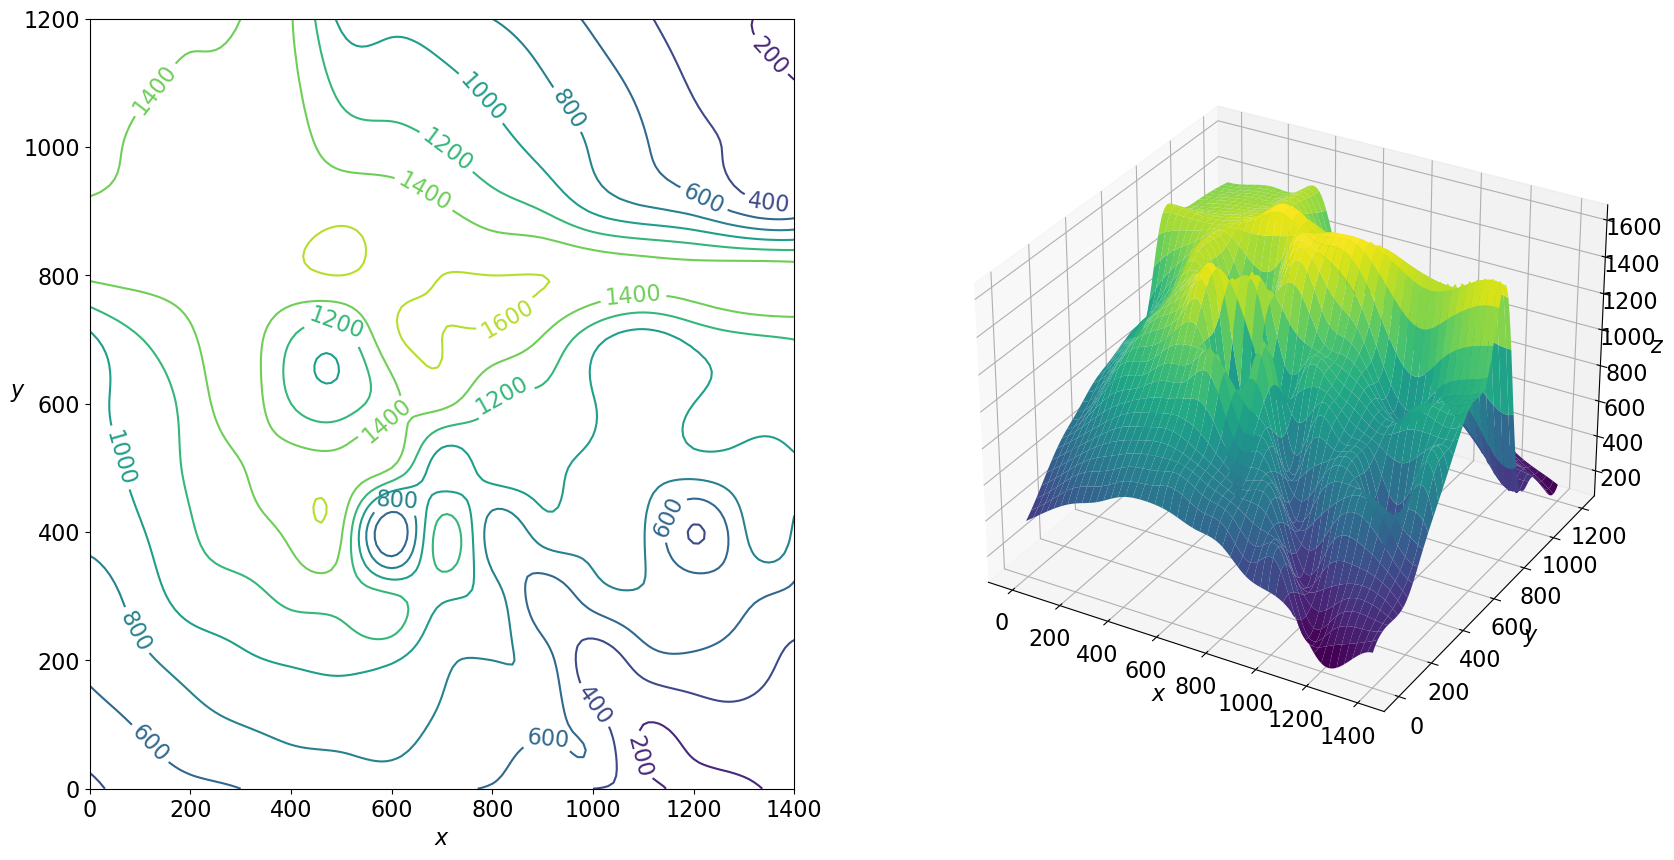

In [1]:
#程序文件名Pex7_5.py
# from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import interp2d
# %matplotlib tk # GUI中显示
# %matplotlib inline # 内嵌显示

# 导入数据：加载高程数据
z = np.loadtxt("data\Pdata7_5.txt")
# print(z)

x = np.arange(0, 1500, 100)
y = np.arange(1200, -100, -100)

# 插值
f = interp2d(x, y, z, 'cubic')
xn = np.linspace(0, 1400, 141)
yn = np.linspace(0, 1200, 121)
zn = f(xn, yn)

# 计算面积
m=len(xn)
n=len(yn)
s=0
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1 = np.array([xn[i], yn[j], zn[j,i]])
        p2 = np.array([xn[i+1], yn[j], zn[j,i+1]])
        p3 = np.array([xn[i+1], yn[j+1], zn[j+1,i+1]])
        p4 = np.array([xn[i], yn[j+1], zn[j+1,i]])
        p12 = norm(p1-p2)
        p23 = norm(p3-p2)
        p13 = norm(p3-p1)
        p14 = norm(p4-p1)
        p34 = norm(p4-p3)
        L1 = (p12+p23+p13)/2
        s1 = np.sqrt(L1*(L1-p12)*(L1-p23)*(L1-p13))
        L2 = (p13+p14+p34)/2
        s2 = np.sqrt(L2*(L2-p13)*(L2-p14)*(L2-p34))
        s = s+s1+s2
print("区域的面积为：", s)

# 可视化
plt.figure(figsize=(20,10))
plt.rc('font',size=16)

#使用tex字体
#plt.rc('text',usetex=True)
plt.subplot(121)
# 绘制等高线
contr = plt.contour(xn,yn,zn) 
plt.clabel(contr) # 与contour连用，用于显示标签
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)

ax = plt.subplot(122,projection='3d'); 
#绘制3D图
X,Y = np.meshgrid(xn,yn)
ax.plot_surface(X, Y, zn, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
# plt.savefig('figure7_5.png',dpi=500)
plt.show()

# 四、拟合
两个常用的拟合的函数：
1. numpy库的polyfit
2. scipy.optimize的curve_fit

## 1. numpy的polyfit函数

拟合二次多项式的从高次幂到低次幂系数分别为： [-9.81083916 20.12929371 -0.03167133]
预测值为： [4.38747465 5.81175367]


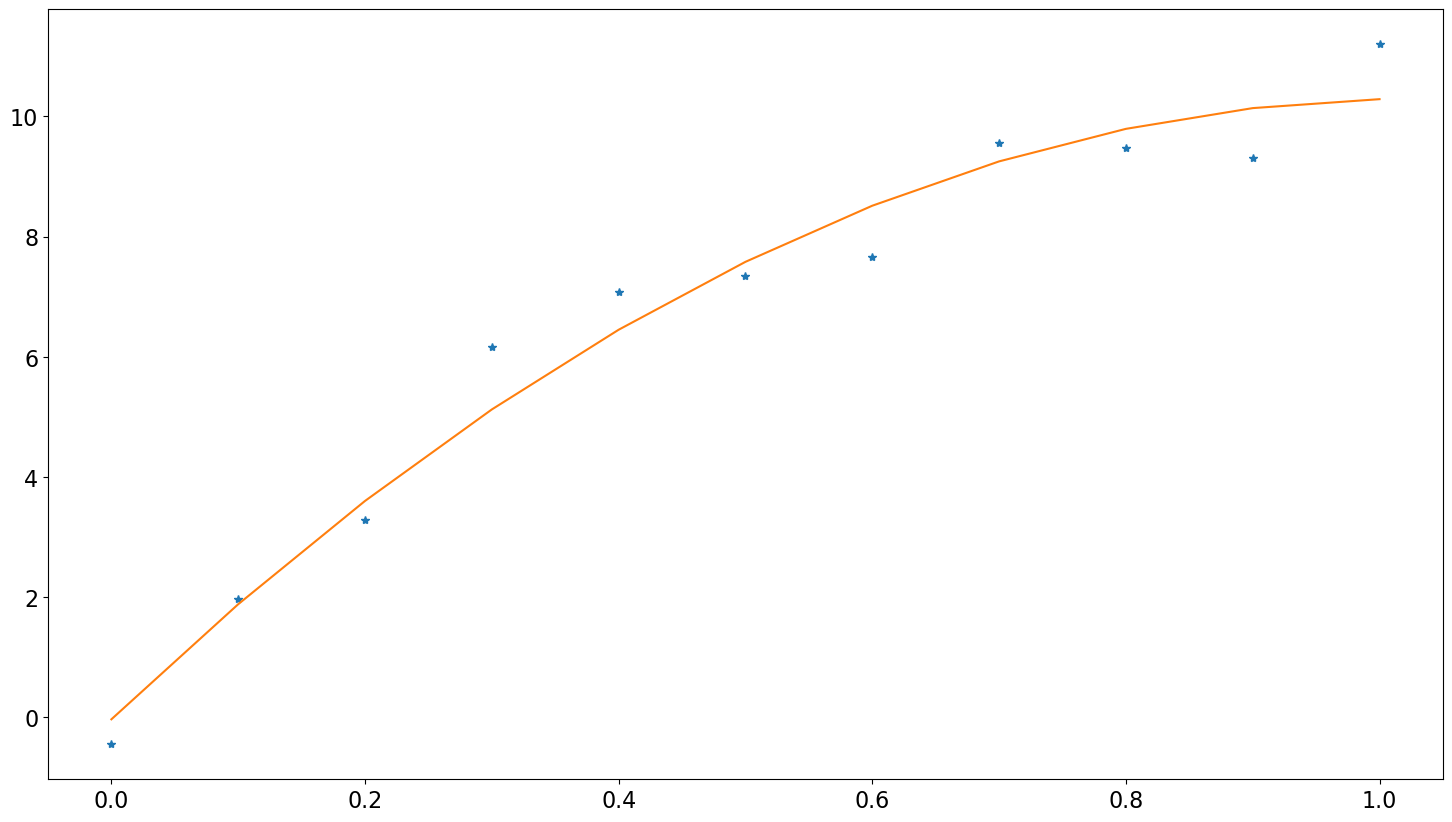

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.arange(0, 1.1, 0.1)
y0 = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
p = np.polyfit(x0, y0, 2)
print("拟合二次多项式的从高次幂到低次幂系数分别为：", p)
yhat = np.polyval(p, [0.25, 0.35])
print("预测值为：", yhat)
plt.figure(figsize=(18, 10))
plt.rc('font', size=16)
plt.plot(x0, y0, '*', x0, np.polyval(p, x0), '-')
plt.show()

## 2. scipy.optimize的curve_fit函数

### 二维curve_fit拟合

**线性函数**

拟合的参数值： [-9.81083901 20.12929291 -0.03167108]
预测值分别为： [4.38747471 5.81175366]


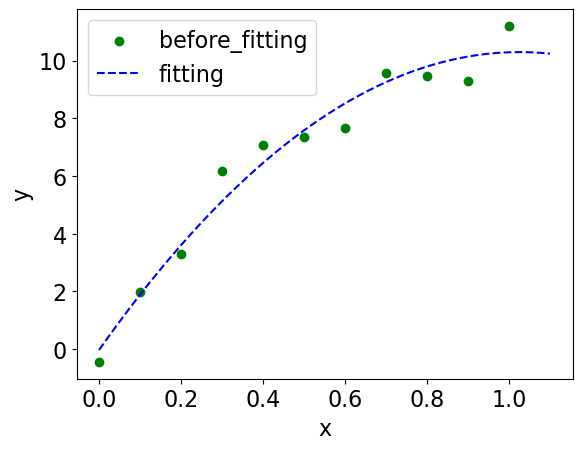

In [9]:
import numpy as np
from scipy.optimize import curve_fit

x0 = np.arange(0, 1.1, 0.1)
y0 = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
y= lambda x, a, b, c: a*x**2+b*x+c
popt, pcov = curve_fit(y, x0, y0)
print("拟合的参数值：", popt)
print("预测值分别为：", y(np.array([0.25, 0.35]), *popt)) # 输入参数不能是列表，要转化为numpy

#可视化
def f_show(x,p_fit):
    a,b,c=p_fit.tolist()
    return a*x**2+b*x+c
#散点图
plt.scatter(x0,y0,c='g',label='before_fitting')
#拟合曲线
x=np.linspace(0,1.1)
y1=f_show(x,popt)
plt.plot(x,y1,'b--',label='fitting')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
import numpy as np
from scipy.interpolate import interp1d

x  = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
y = [18, 24, 28, 27, 25, 20, 18, 12, 9, 9, 10, 15, 13]
p = interp1d(x, y, 'cubic')
print(p(2.5))

25.404251750062787


**非线性函数**

[2.10431845 3.03820933]
[[ 1.03004580e-02 -5.83519229e-12]
 [-5.83519229e-12  5.04722444e-03]]


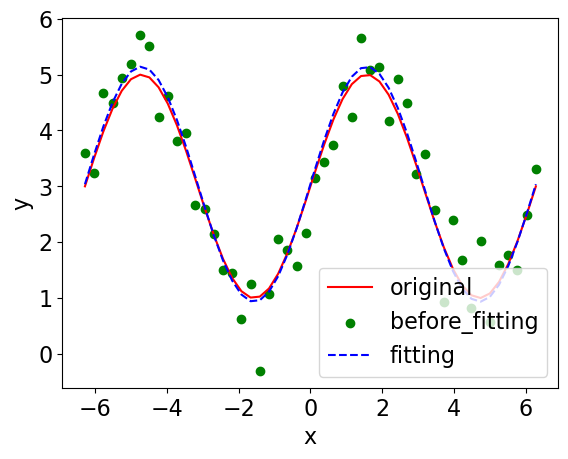

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
 
 #原函数
def f(x):
    return 2*np.sin(x)+3
#拟合函数    
def f_fit(x,a,b):
    return a*np.sin(x)+b
    
def f_show(x,p_fit):
    a,b=p_fit.tolist()
    return a*np.sin(x)+b
    
x=np.linspace(-2*np.pi,2*np.pi)
y=f(x)+0.5*np.random.randn(len(x))#加入了噪音
p_fit,pcov=curve_fit(f_fit,x,y)#曲线拟合

print(p_fit)#最优参数
print(pcov)#最优参数的协方差估计矩阵
y1=f_show(x,p_fit)

#原曲线
plt.plot(x,f(x),'r',label='original')
#散点图
plt.scatter(x,y,c='g',label='before_fitting')
#拟合曲线
plt.plot(x,y1,'b--',label='fitting')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 三维curve_fit拟合

a，b，c的拟合值为： [ 5.08907305e+00 -2.58248004e-03 -2.14509683e-02]


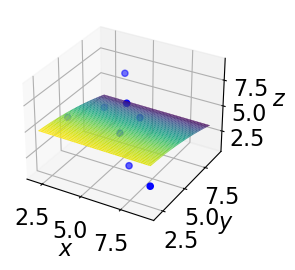

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.interpolate import interp2d
def Pfun(t, a, b, c):
    return a*np.exp(b*t[0])+c*t[1]**2

# 原始数据
x0 = np.array([6, 2, 6, 7, 4, 2, 5, 9])
y0 = np.array([4, 9, 5, 3, 8, 5, 8, 2])
z0 = np.array([5, 2, 1, 9, 7, 4, 3, 3])

# 拟合
xy0 = np.vstack((x0, y0))
# print(xy0)
popt, pcov = curve_fit(Pfun, xy0, z0)
print("a，b，c的拟合值为：", popt)


def result(popt,x,y):
    a,b,c=popt
    return a*np.exp(b*x)+c*y**2

x_range = np.linspace(min(x0), max(x0), 100)
y_range = np.linspace(min(y0), max(y0), 100)

#可视化
ax = plt.subplot(122,projection='3d'); 
ax.scatter(x0, y0, z0, c='blue', marker='o')

# 生成x和y的网格
x_grid, y_grid = np.meshgrid(x_range, y_range)
# 计算对应的z值
z_grid = result(popt,x_grid, y_grid)



ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
# plt.savefig('figure7_5.png',dpi=500)
plt.show()
